In [3]:
# initializing all libraries 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [4]:
# loading the lab dataset

unilab_df = pd.read_csv('/Users/sashacrowe/codebase-ih/lab-eda-univariate/amz_uk_price_prediction_dataset.csv')

## First Look at the Dataset

In [6]:
unilab_df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [7]:
unilab_df.shape

(2443651, 9)

In [8]:
unilab_df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

**What are we looking at**

uid -> unique id index -> int    
asin -> serial id (with letters) -> string     
title -> name of prod -> string    
stars -> review -> float   
price -> float    
isBestSeller -> boolean with true = best seller   
**boughtInLastMonth** -> categorical var but listed as int   
category -> prod category var as string

In [9]:
# Checking for missing data
unilab_df.isnull().sum().sort_values(ascending=False)

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [45]:
(unilab_df['price'] == 0).sum()

20

In [46]:
(unilab_df['price'] < 50).sum()

1876679

## Part 1: Understanding Product Categories
**Business Question:** What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**   
   Generate a freq tbl for the product category

In [14]:
# how many categories are in the 'category' col?
unilab_df['category'].nunique()

296

In [22]:
unilab_prodcat_freq_tbl = unilab_df['category'].value_counts().sort_values(ascending=False)

Which are the top 5 most listed product categories?

In [23]:
# these are the top 5 most listed product categories:
unilab_prodcat_freq_tbl.head()

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

2. **Visualizations**
   Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.

<Axes: xlabel='category'>

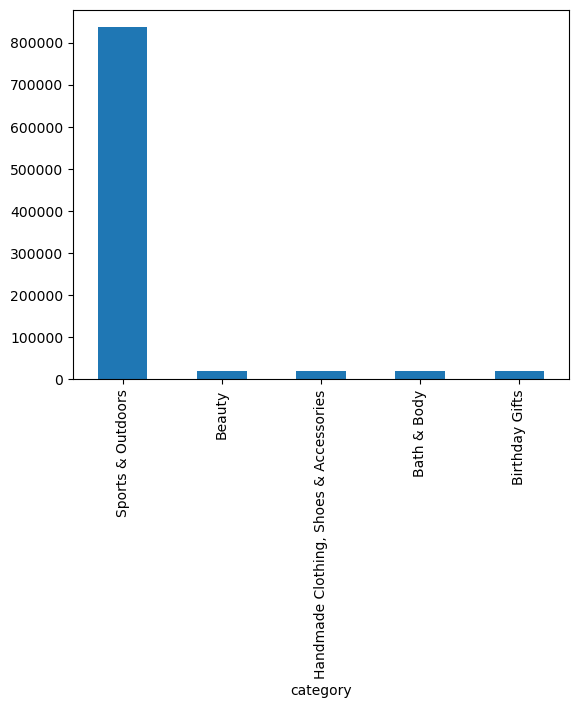

In [24]:
top5cat = unilab_prodcat_freq_tbl.head()
top5cat.plot.bar()

For a subset of top categories, visualize their proportions using a pie chart.      
Does any category dominate the listings? -> Yes, Sports & Outdoors

<Axes: ylabel='count'>

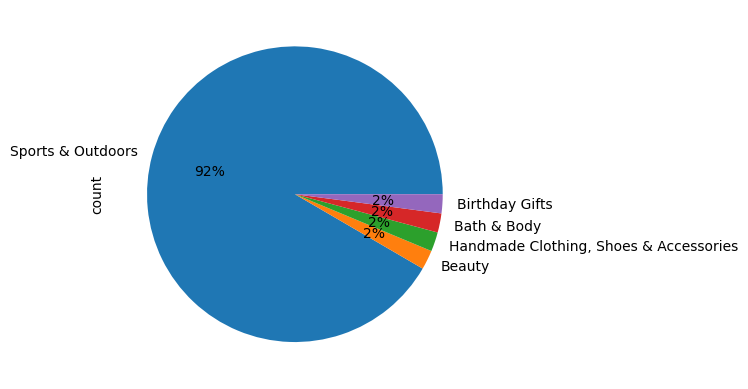

In [29]:
top5cat.plot.pie(autopct='%1.0f%%')

## Part 2: Delving into Product Pricing
**Business Question:** How are products priced on Amazon UK, and are there specific price points or ranges that are more common?  

1. **Measures of Centrality:**
   Calculate the mean, median, and mode for the price of products.

In [31]:
mean_price = unilab_df['price'].mean().round(2)
median_price = unilab_df['price'].median()
mode_price = unilab_df['price'].mode()[0]

print(f"Mean: {mean_price}")
print(f"Median: {median_price}")
print(f"Mode: {mode_price}")

Mean: 89.24
Median: 19.09
Mode: 9.99


In [32]:
mean_price - mode_price

79.25

What's the average price point of products listed? How does this compare with the most common price point (mode)?
- The average price is 89.24 which is 79.25 higher than the mode, which is 9.99  

2. **Measures of Dispersion:**    
   Determine the variance, standard deviation, range, and interquartile range for product price.

In [50]:
variance_price = round(unilab_df['price'].var(),2)
std_dev_price = round(unilab_df['price'].std(),2)
r_max_p = unilab_df['price'].max()
r_min_p = unilab_df['price'].min()
range_price = r_max_p - r_min_p
Q1_p = unilab_df['price'].quantile(0.25)
Q3_p = unilab_df['price'].quantile(0.75)
IQR_price = Q3_p - Q1_p

print(f"Variance: {variance_price}")
print(f"Standard Deviation: {std_dev_price}")
print(f"Interquartile Range (IQR): The 25th percentile {Q1_p} - the 75th percentile {Q3_p} = {IQR_price}")
print(f"Range = max value {r_max_p} - min value {r_min_p} = {range_price}")

Variance: 119445.49
Standard Deviation: 345.61
Interquartile Range (IQR): The 25th percentile 9.99 - the 75th percentile 45.99 = 36.0
Range = max value 100000.0 - min value 0.0 = 100000.0


How varied are the product prices? Are there any indicators of a significant spread in prices?
- The IQR is between 9.99 & 45.99, which spreads over an amount of 36.00 -> indicates bulk of prices are in this range
- std is 345.61
- The lowest value is free with a 0 going up to a max value of 100,000.00
- With the bulk of prices being inbetween 9.99 & 45.99, the data indicates there are some outliers going up the range

3. **Visualizations**   
   Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices

<Axes: xlabel='price', ylabel='Count'>

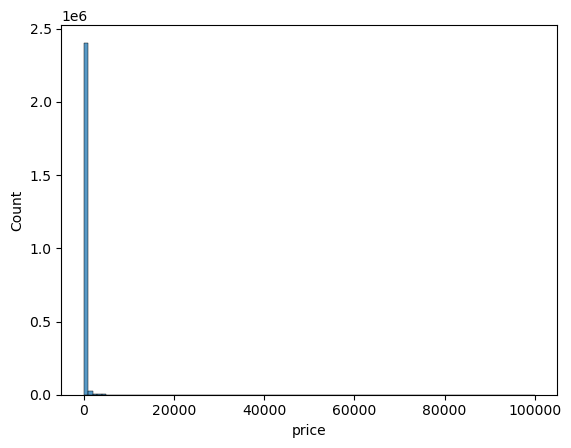

In [41]:
sns.histplot(unilab_df['price'], kde=False, bins=100)

Are there products that are priced significantly higher than the rest? -> Yes, there are a lot of items under 50, but the range goes to 100,000   
Use a box plot to showcase the spread and potential outliers in product pricing.

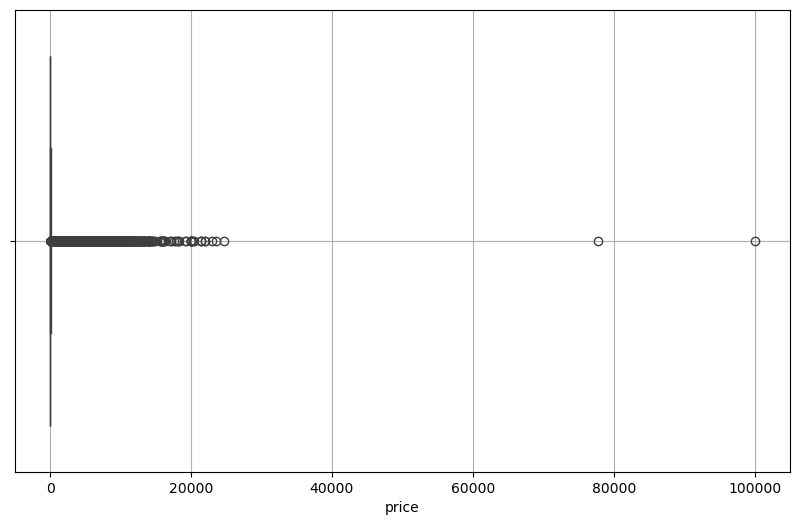

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=unilab_df['price'])
plt.grid(True)
plt.show()

## Part 3: Unpacking Product Ratings
**Business Question:** How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality:**

- Calculate the mean, median, and mode for the rating of products.
- How do customers generally rate products? Is there a common trend? -> With the Median & Mode being 0 that means most ppl don't leave a review, because if they did the lowest number is 1. This skews the mean to 2.15 because it includes all the non-reviews.

In [47]:
mean_stars = unilab_df['stars'].mean().round(2)
median_stars = unilab_df['stars'].median()
mode_stars = unilab_df['stars'].mode()[0]

print(f"Mean: {mean_stars}")
print(f"Median: {median_stars}")
print(f"Mode: {mode_stars}")

Mean: 2.15
Median: 0.0
Mode: 0.0


2. **Measures of Dispersion:**

Determine the variance, standard deviation, and interquartile range for product rating.   
Are the ratings consistent, or is there a wide variation in customer feedback? -> the range matches the max value, meaning there is a high variation, especially when the 25th percentile is 0

In [49]:
variance_stars = round(unilab_df['stars'].var(),2)
std_dev_stars = round(unilab_df['stars'].std(),2)
r_max_s = unilab_df['stars'].max()
r_min_s = unilab_df['stars'].min()
range_stars = r_max_s - r_min_s
Q1_s = unilab_df['stars'].quantile(0.25)
Q3_s = unilab_df['stars'].quantile(0.75)
IQR_stars = Q3_s - Q1_s

print(f"Variance: {variance_stars}")
print(f"Standard Deviation: {std_dev_stars}")
print(f"Interquartile Range (IQR): The 25th percentile {Q1_s} - the 75th percentile {Q3_s} = {IQR_stars}")
print(f"Range = max value {r_max_s} - min value {r_min_s} = {range_stars}")

Variance: 4.82
Standard Deviation: 2.19
Interquartile Range (IQR): The 25th percentile 0.0 - the 75th percentile 4.4 = 4.4
Range = max value 5.0 - min value 0.0 = 5.0


3. **Shape of the Distribution:**

Calculate the skewness and kurtosis for the rating column.   
Are the ratings normally distributed, or do they lean towards higher or lower values?

-> Skewness: The relatively neutral value of skewness (0.08) for 'stars' indicates that the distribution is roughly balanced. This means that the tails on both side are evening each other out. In practical terms, this suggests that the stars, when given, are rather high.

-> Kurtosis: The kurtosis value of -1.93 is less than 0, which indicates that the 'stars' distribution has lighter tails and a flatter peak compared to a normal distribution. This means that there are fewer outliers (extreme values) in the 'stars' than one would expect in a normally distributed set.

-> The skewness and kurtosis values suggest that the data is oddly balanced and flat, forming more like a valley than a peak. This would mean that when a star is given, the rating is rather high, but most records don't leave a star.


In [52]:
skewness_stars = unilab_df['stars'].skew()
kurtosis_stars = unilab_df['stars'].kurtosis()

skewness_stars, kurtosis_stars

(0.08120735761080985, -1.9260061280432985)

3. **Visualizations**   
   Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common? -> 0 is most common

<Axes: xlabel='stars', ylabel='Count'>

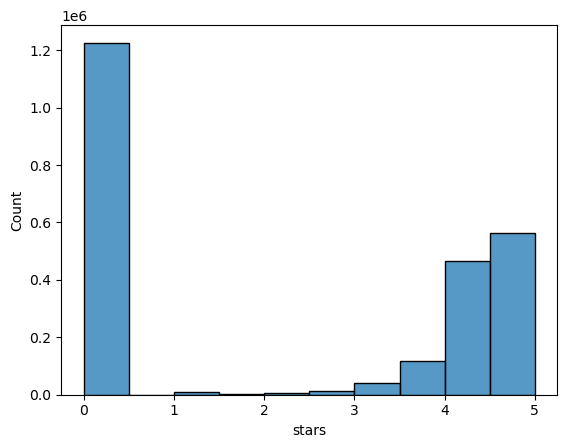

In [53]:
sns.histplot(unilab_df['stars'], kde=False, bins=10)